In [1]:
import numpy
import sklearn.metrics
import sklearn.linear_model

In [2]:
x_train = numpy.array([[-0.8 , -0.8 ],
       [-0.8 , -0.48],
       [-0.8 , -0.16],
       [-0.8 ,  0.16],
       [-0.8 ,  0.48],
       [-0.8 ,  0.8 ],
       [-0.48, -0.8 ],
       [-0.48, -0.48],
       [-0.48, -0.16],
       [-0.48,  0.16],
       [-0.48,  0.48],
       [-0.48,  0.8 ],
       [-0.16, -0.8 ],
       [-0.16, -0.48],
       [-0.16, -0.16],
       [-0.16,  0.16],
       [-0.16,  0.48],
       [-0.16,  0.8 ],
       [ 0.16, -0.8 ],
       [ 0.16, -0.48],
       [ 0.16, -0.16],
       [ 0.16,  0.16],
       [ 0.16,  0.48],
       [ 0.16,  0.8 ],
       [ 0.48, -0.8 ],
       [ 0.48, -0.48],
       [ 0.48, -0.16],
       [ 0.48,  0.16],
       [ 0.48,  0.48],
       [ 0.48,  0.8 ],
       [ 0.8 , -0.8 ],
       [ 0.8 , -0.48],
       [ 0.8 , -0.16],
       [ 0.8 ,  0.16],
       [ 0.8 ,  0.48],
       [ 0.8 ,  0.8 ]])
y_train = numpy.array([19.16695052, 13.22042364, 10.06006317, 10.07024508, 13.09231182, 19.28932958, 13.09699286,  7.02510918,  3.77707591,  3.75280753, 6.98970389, 12.95676487, 10.01139805,  3.83283814,  0.75967419, 0.66507218,  4.08057273,  9.83142631, 10.14434347,  3.87253675, 0.48726579,  0.85708327,  3.62700781,  9.98383945, 13.03754723, 6.91194217,  3.80872056,  3.75064037,  6.96504836, 13.03395797, 19.18596309, 13.22441868,  9.97017209,  9.9608034 , 13.03983236, 19.25797367])
x_test = numpy.array([[ 0.60066134,  0.75514525],
       [ 0.62493958,  0.74354012],
       [ 0.68757087,  0.68514481],
       [ 0.70646998,  0.74249948],
       [-0.86394857,  0.22874845],
       [ 0.2215083 ,  0.49629939],
       [ 0.44835169,  0.98975117],
       [-0.76399039, -0.94554732],
       [ 0.39836963, -0.10177351],
       [ 0.91524278,  0.53612187],
       [-0.41065771,  0.56951352],
       [ 0.16812817,  0.7284085 ],
       [ 0.8898741 ,  0.73323525],
       [-0.86431684,  0.12372524],
       [-0.2547392 ,  0.56557855],
       [ 0.45626855, -0.98097258],
       [ 0.01415029,  0.26820149],
       [-0.97811162, -0.2954746 ],
       [ 0.78104109, -0.22334335],
       [-0.60341742,  0.60002444],
       [-0.79763483,  0.29683079],
       [-0.64229142,  0.66181316],
       [ 0.84009633, -0.1485917 ],
       [ 0.46944093,  0.27329434],
       [ 0.41647943, -0.22300934]])
y_test = numpy.array([14.0648327 , 14.1768829 , 14.2222626 , 15.71538637, 11.79833645, 4.46068088, 17.72559463, 21.99815467,  2.53139972, 16.72969738, 7.42901727,  8.35165552, 20.00799747, 11.42873041,  5.70221722, 17.6655741 ,  0.91620557, 15.67473377,  9.98291571, 10.84098305, 10.81040218, 12.7695035 , 10.84929453,  4.34147587,  3.45347178])




In [4]:
# 导入相关模块
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

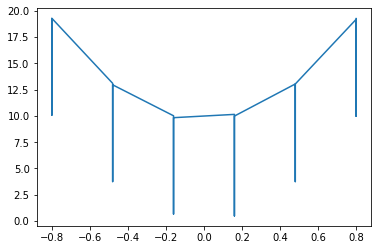

In [10]:
plt.plot(x_train[:,0], y_train)
plt.show()

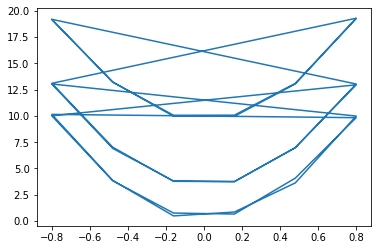

In [11]:
plt.plot(x_train[:,1], y_train)
plt.show()

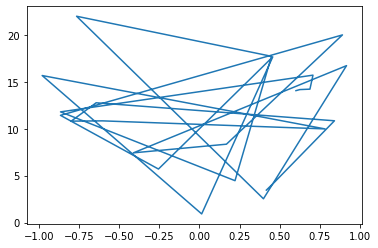

In [12]:
plt.plot(x_test[:,0], y_test)
plt.show()

In [7]:
def eval_model(true_label, prediction):
    metric = numpy.sqrt(sklearn.metrics.mean_squared_error(true_label, prediction))
    check = lambda x: "达到目标精度" if x < 0.15 else "未达到目标精度"
    print(f"效果：{metric:.2f} {check(metric)}")

# 问题定义：上面提供了训练数据(x_train, y_train)，请在训练数据上训练模型，在x_test上用模型预测，并和真实值y_test对比计算模型效果。这里提供了评估模型效果的函数eval_model（可以看出模型效果指标为RMSE）。由于面试工具提供的python分析工具有限，本题鼓励候选人在自己电脑环境上对数据进行分析，构造模型使它的测试集RMSE在0.1左右，并用numpy, pandas, sklearn中的函数将算法实现在下面。（切换屏幕时面试工具会提醒作弊，这个不用理会，本题不对切屏做限制）
# 这里提供一个简单例子，可以看到RMSE > 6，效果是很差的

# model = sklearn.linear_model.LinearRegression()


from sklearn.linear_model import Lasso
model = Lasso(alpha=0.05, normalize=True)
model.fit(x_train, y_train)
pred = model.predict(x_test)
eval_model(y_test, pred)

效果：6.02 未达到目标精度


In [8]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.05, normalize=True)
model.fit(x_train, y_train)
pred = model.predict(x_test)
eval_model(y_test, pred)

效果：6.03 未达到目标精度


In [13]:
from sklearn.preprocessing import PolynomialFeatures
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(x_train)
X_test_quadratic = quadratic_featurizer.fit_transform(x_test)
model = sklearn.linear_model.LinearRegression()
model.fit(X_train_quadratic, y_train)
pred = model.predict(X_test_quadratic)
eval_model(y_test, pred)

效果：0.11 达到目标精度
